In [1]:
import os
import tarfile
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
file1_path = "raw_data/extracted_drug_response_files/c1f6276e-6e34-4c18-b599-88ffe9ad20bc/nationwidechildrens.org_clinical_drug_lgg.txt"
df1 = pd.read_csv(file1_path, sep='\t')


In [46]:
print(f"df1 shape{df1.shape} ")


df1 shape(697, 28) 


In [47]:
df1.to_csv('raw_data/extracted_drug_response_files/lgg.csv', index=False)

In [64]:
drug_response_df = pd.read_csv('raw_data/extracted_drug_response_files/lgg.csv')

In [49]:
drug_response_df.shape

(695, 28)

In [50]:
drug_response_df.isnull().sum()

bcr_patient_uuid                       0
bcr_patient_barcode                    0
bcr_drug_barcode                       0
bcr_drug_uuid                          0
form_completion_date                   0
pharmaceutical_therapy_drug_name       0
clinical_trial_drug_classification     0
pharmaceutical_therapy_type            0
pharmaceutical_tx_started_days_to      0
pharmaceutical_tx_ongoing_indicator    0
pharmaceutical_tx_ended_days_to        0
treatment_best_response                0
days_to_stem_cell_transplantation      0
pharm_regimen                          0
pharm_regimen_other                    0
pharma_adjuvant_cycles_count           0
pharma_type_other                      0
pharmaceutical_tx_dose_units           0
pharmaceutical_tx_total_dose_units     0
prescribed_dose                        0
regimen_number                         0
route_of_administration                0
stem_cell_transplantation              0
stem_cell_transplantation_type         0
therapy_regimen 

In [51]:
unique_patients = drug_response_df['bcr_patient_uuid'].nunique()
print(f"Number of unique patients (by UUID): {unique_patients}")

Number of unique patients (by UUID): 285


In [52]:
unique_drugs = drug_response_df['pharmaceutical_therapy_drug_name'].nunique()
# print(unique_drugs.shape)
print("\nUnique Drug Names:\n", unique_drugs)


Unique Drug Names:
 90


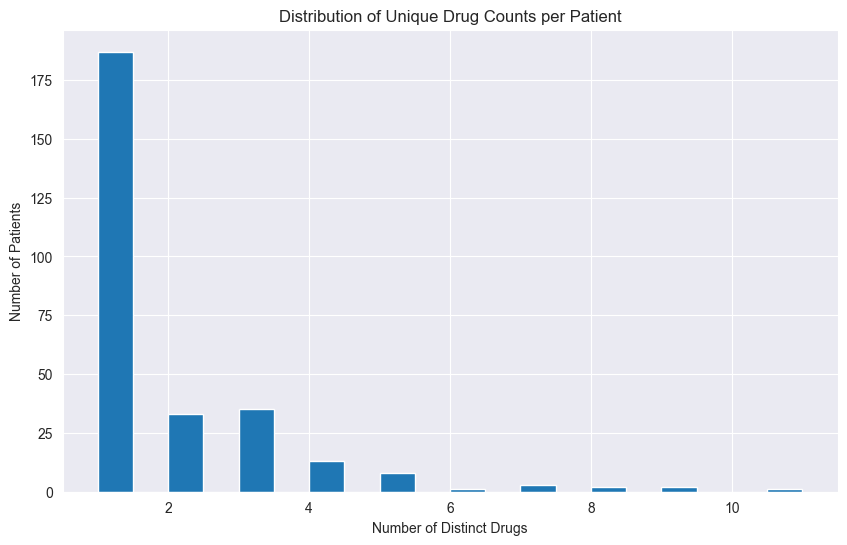

In [53]:
drug_counts = drug_response_df.groupby('bcr_patient_uuid')['pharmaceutical_therapy_drug_name'].nunique()
drug_counts.plot(kind='hist', bins=20, figsize=(10, 6), title='Distribution of Unique Drug Counts per Patient')
plt.xlabel('Number of Distinct Drugs')
plt.ylabel('Number of Patients')
plt.show()

In [54]:
pharmaceutical_therapy_type = drug_response_df['pharmaceutical_therapy_type'].unique()
print(pharmaceutical_therapy_type.shape)
print("\nUnique pharmaceutical therapy type Names:\n", pharmaceutical_therapy_type)

(7,)

Unique pharmaceutical therapy type Names:
 ['Chemotherapy' 'Targeted Molecular therapy' 'Hormone Therapy'
 'Other, specify in notes' '[Not Available]' 'Immunotherapy' 'Ancillary']


## LGG Clinical Data

In [23]:
file_path = "raw_data/extracted_clinical_patient_data/f3a1bc62-9552-4553-b318-7d9c21d21ce7/nationwidechildrens.org_clinical_patient_lgg.txt"

In [24]:
df = pd.read_csv(file_path, sep='\t')

In [25]:
print(f"df shape{df1.shape} ")

df shape(1507, 28) 


In [59]:
df.to_csv('raw_data/extracted_clinical_patient_data/lgg_patient_clinical_df.csv', index=False)

In [62]:
patient_clinical_df = pd.read_csv('raw_data/extracted_clinical_patient_data/lgg_patient_clinical_df.csv')
patient_clinical_df.shape

(517, 69)

In [56]:
unique_patients = patient_clinical_df['bcr_patient_uuid'].nunique()
print(f"Number of unique patients (by UUID): {unique_patients}")

Number of unique patients (by UUID): 515


In [65]:
drug_response_df_set = set(drug_response_df['bcr_patient_uuid'].unique())
patient_clinical_df_set = set(patient_clinical_df['bcr_patient_uuid'].unique())

common_patients = drug_response_df_set.intersection(patient_clinical_df_set)

num_common_patients = len(common_patients)

print(f"Number of patients in common: {num_common_patients}")

Number of patients in common: 285


In [66]:
merge_key = 'bcr_patient_uuid'

merged_df = pd.merge(drug_response_df, patient_clinical_df, on=merge_key, how='inner')
print("\nMerged Data Info:")
print(merged_df.info())


Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 96 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   bcr_patient_uuid                      695 non-null    object
 1   bcr_patient_barcode_x                 695 non-null    object
 2   bcr_drug_barcode                      695 non-null    object
 3   bcr_drug_uuid                         695 non-null    object
 4   form_completion_date_x                695 non-null    object
 5   pharmaceutical_therapy_drug_name      695 non-null    object
 6   clinical_trial_drug_classification    695 non-null    object
 7   pharmaceutical_therapy_type           695 non-null    object
 8   pharmaceutical_tx_started_days_to     695 non-null    object
 9   pharmaceutical_tx_ongoing_indicator   695 non-null    object
 10  pharmaceutical_tx_ended_days_to       695 non-null    object
 11  treatment_bes

In [67]:
merged_df.to_csv('raw_data/lgg_merged_drug_clinical.csv', index=False)